In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import levene


enem_sp = pd.read_csv('/Users/paull/OneDrive/Área de Trabalho/LEONARDO/python/jupyter/enem_2019_tratado.csv',
                     sep = ',', encoding = 'iso-8859-1')

Objetivo: Analisar a diferença entre as médias de dois componentes de redação do colégio y

In [2]:
colegioy = enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]
colegioy.shape

(30, 24)

In [5]:
# 1) analisar a classificação das variáveis
colegioy.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

In [7]:
# 2) analisar valores faltantes
colegioy.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

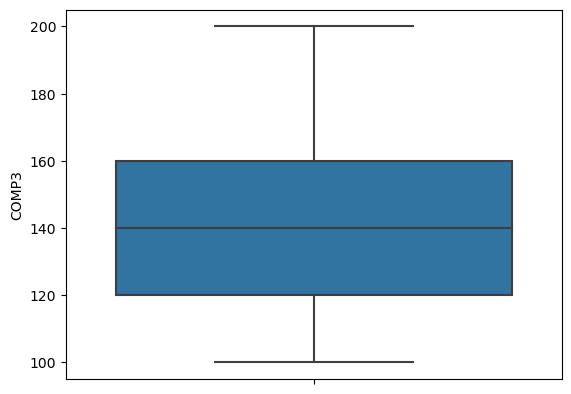

In [10]:
# 3) Analisar outliers

grafico = sns.boxplot(data = colegioy, y ="COMP3")

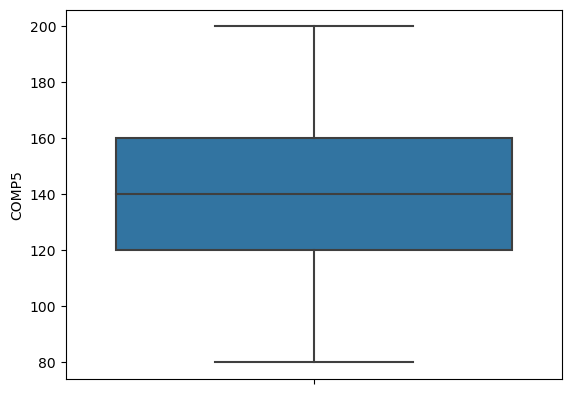

In [11]:
grafico2 = sns.boxplot(data = colegioy, y ="COMP5")

# Critérios para Análise da Normalidade
Nível de significância de 0,05 ou 5% (mais utilizado)
Quando p > 0,05 (dist normal)

In [15]:
# 4) Analise de Normalidade

#Teste de Shapiro - Wilk
stats.shapiro(colegioy.COMP5)

ShapiroResult(statistic=0.9479595422744751, pvalue=0.14903278648853302)

- distribuição normal

In [18]:
stats.shapiro(colegioy.COMP4)

ShapiroResult(statistic=0.8708714842796326, pvalue=0.0017518323147669435)

- distribuição não é normal

In [19]:
stats.shapiro(colegioy.COMP3)

ShapiroResult(statistic=0.916003406047821, pvalue=0.02115193009376526)

- distribuição não é normal

In [22]:
# Teste Lilliefors (Kolmogorov_Smirnov)
statsmodels.stats.diagnostic.lilliefors(colegioy.COMP5, dist = 'norm')

(0.1532178553086273, 0.06880798377868974)

- confirmação de normal

In [23]:
statsmodels.stats.diagnostic.lilliefors(colegioy.COMP3, dist = 'norm')

(0.20710628123776997, 0.0022752873084563707)

- não é normal

<AxesSubplot:xlabel='COMP5', ylabel='Probability'>

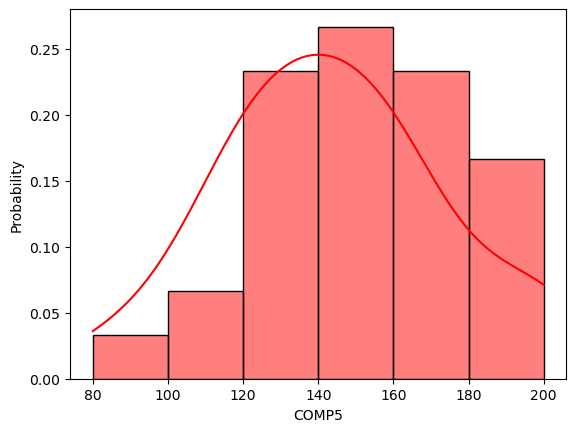

In [24]:
sns.histplot(colegioy, x='COMP5',bins = 6, color = "red", kde = True, stat= "probability")

<AxesSubplot:xlabel='COMP3', ylabel='Probability'>

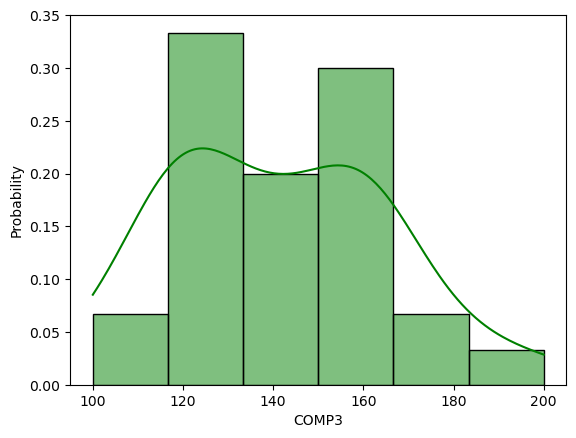

In [25]:
sns.histplot(colegioy, x='COMP3',bins = 6, color = "green", kde = True, stat= "probability")

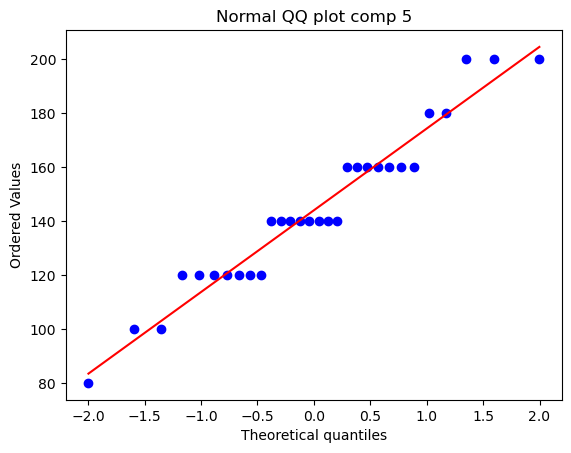

In [27]:
stats.probplot(colegioy['COMP5'], dist = "norm", plot=plt)
plt.title("Normal QQ plot comp 5")
plt.show()

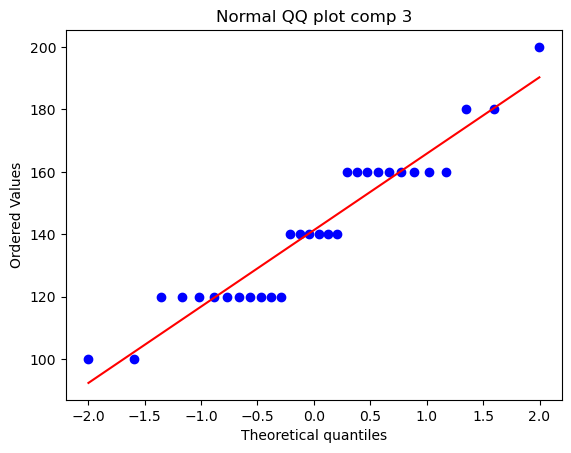

In [28]:
stats.probplot(colegioy['COMP3'], dist = "norm", plot=plt)
plt.title("Normal QQ plot comp 3")
plt.show()

# como é feita a variabilidade dos erros constantes.

Ho = variância homogênea : p > 0.05
Ha = variância não homogênea : p <= 0.05

In [31]:
# 5) Homogeineidade das variâncias (Homocedasticidade)

# teste de Levene


stat, p = levene(colegioy.COMP3, colegioy.COMP5, center ='mean')
print('Estatística do teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística do teste: 0.61
p-valor: 0.4382667191


stat = estatistica do teste 
p = p valor

# Teste t-student (amostras independentes)

### Comparação das médias das notas dos componentes 3 e 5 da redação do colégio Y.

Ho = Não há diferença entre as médias dos componentes: p > 0.05
Ha = Há diferença entre as médias dos componentes: p <= 0.05

In [32]:
stat, p = stats.ttest_ind(colegioy['COMP3'], colegioy['COMP5'])
print('Estatística do teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística do teste: -0.38
p-valor: 0.7073512583


# Interpretação

teste estatístico: -0,38

p_valor = 0,707
Conclusão: Estatisticamente, com intervalo de confiança de 95%, a média do componente 3 de redação não é diferente da média do componente 5 com relação ao colegio y. Isso ocorre comparando todas as medidas que afetam a população, sendo elas média, desvio padrão, variância...